In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dedalus.public as de

In [2]:
plt.style.use('prl')

In [3]:
nx = 128
xb = de.Fourier('x',nx) # a basis
d1 = de.Domain([xb,], grid_dtype='float64') # domain 

x = d1.grids()[0]

In [4]:
u = d1.new_field()

In [5]:
u['g'] = np.sin(x) # ['g'] --> "grid space"

Text(0, 0.5, 'u(x)')

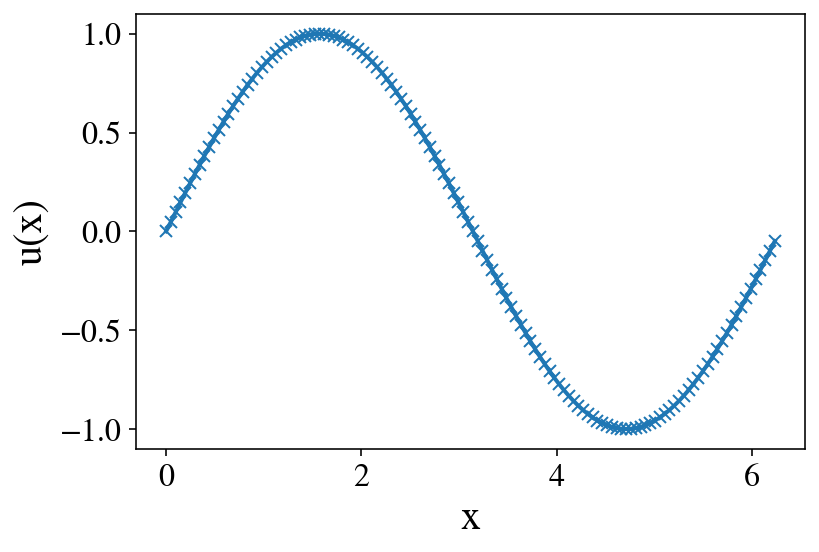

In [7]:
plt.plot(x, u['g'],'x-')
plt.xlabel('x')
plt.ylabel('u(x)')

So, we are saying that 

$$
u(x) \simeq \sum_k{ \hat{u}_k e^{ik x}},
$$

where $e^{i k x} = \cos{k x} + i \sin{k x}$ is called the $k$th **mode**.

In Dedalus-speak, `u['c']` corresponds to $\hat{u}_k$.

In [9]:
np.abs(u['c']) > 1e-9 # coefficient space

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

So, that makes sense becuase 

$$
u(x) = \sin(x), x \in [0, 2\pi)
$$

is represented by

$$
u(x) = 0 + 0.5i e^{ix} + 0 + \dots
$$
Now, let's consider a gaussian

$$
v(x) = \exp{-\frac{(x-\pi)^2}{2}}
$$

In [10]:
v = d1.new_field()

In [18]:
v['g'] = np.exp(-(x-np.pi)**2/0.5)

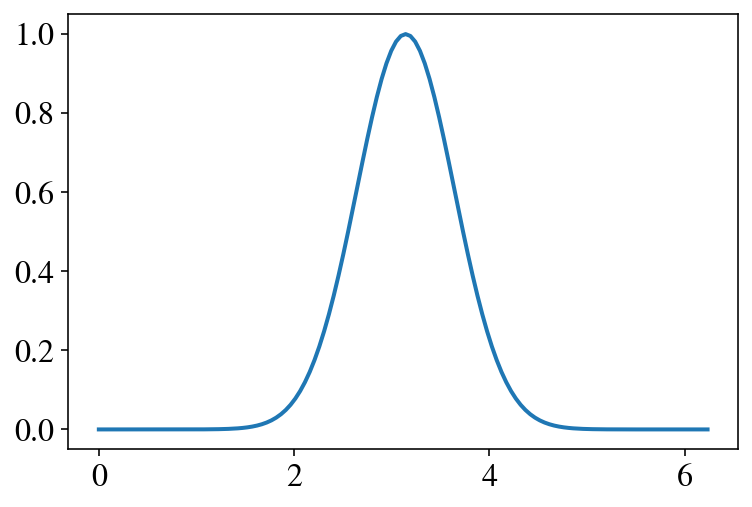

In [19]:
plt.plot(x,v['g'])

In [23]:
np.abs(v['c']) > 1e-14

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Text(0, 0.5, '$|\\hat{v}|$')

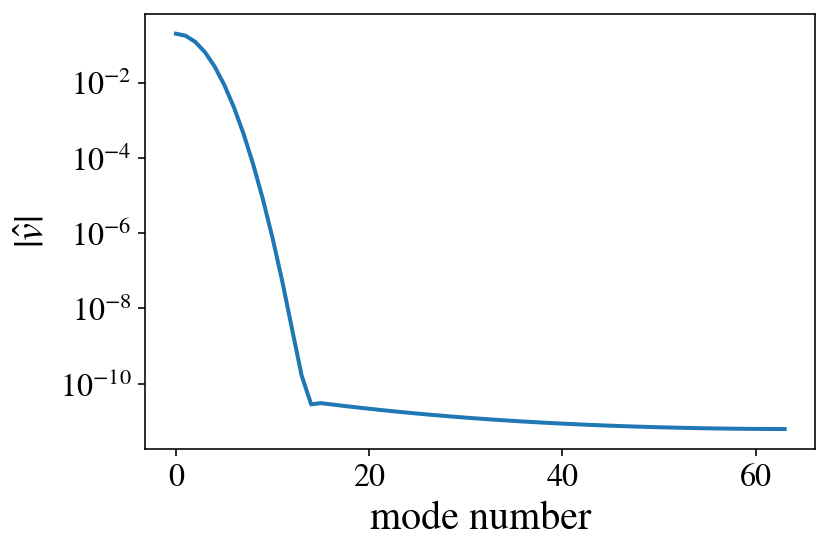

In [24]:
plt.semilogy(np.abs(v['c']))
plt.xlabel("mode number")
plt.ylabel(r"$|\hat{v}|$")

## Non-Linearity

New field $w(x) = \sin(k_2 x)$, $k_2 = 2.

In [25]:
w = d1.new_field()

In [26]:
w['g'] = np.sin(2*x)

Text(0, 0.5, 'u(x)')

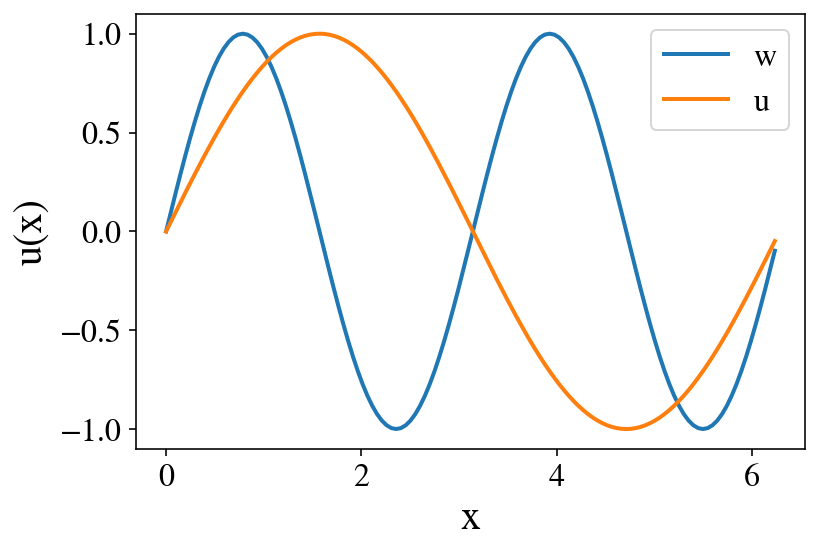

In [27]:
plt.plot(x,w['g'], label='w')
plt.plot(x,u['g'], label='u')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')

In [28]:
wu_sum = (w + u).evaluate()

Text(0, 0.5, 'u(x) + w(x)')

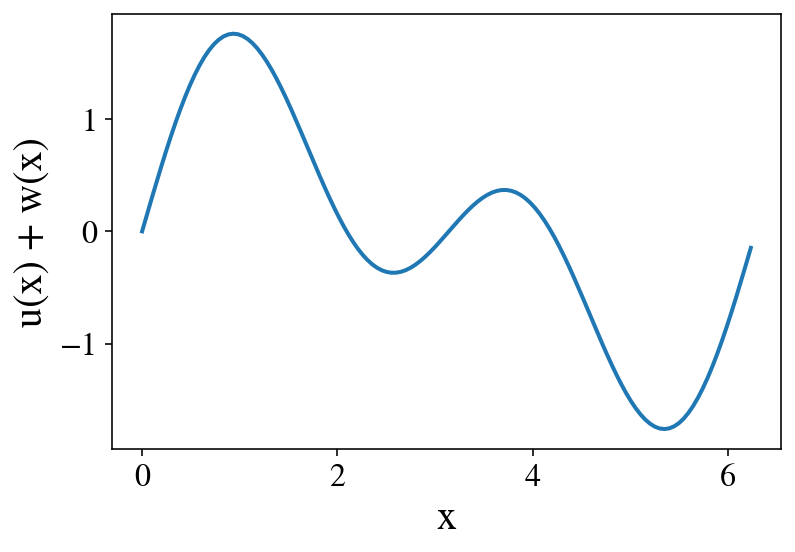

In [31]:
plt.plot(x, wu_sum['g'])
plt.xlabel('x')
plt.ylabel('u(x) + w(x)')

(0.0, 10.0)

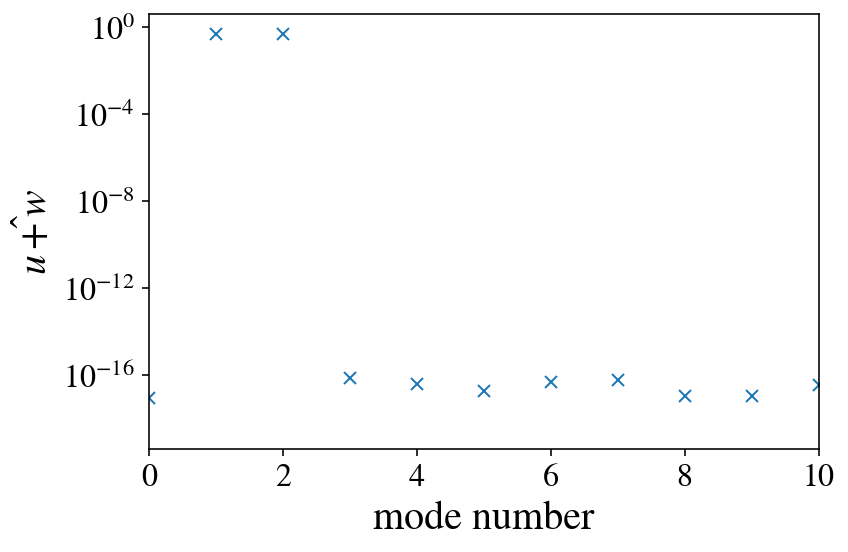

In [40]:
plt.semilogy(np.abs(wu_sum['c']),'x')
plt.xlabel('mode number')
plt.ylabel(r'$\hat{u + w}$')
plt.xlim(0,10)

In [36]:
wu_prod = (w * u).evaluate()

Text(0, 0.5, 'u(x) w(x)')

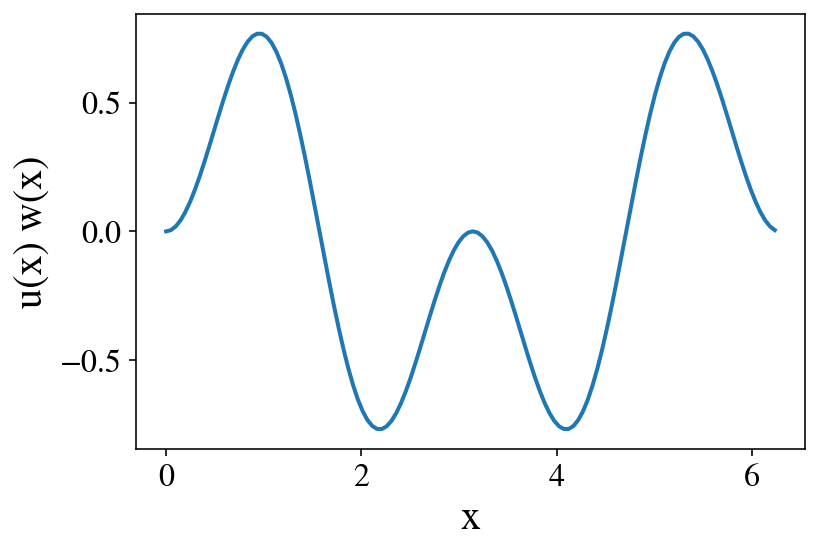

In [37]:
plt.plot(x, wu_prod['g'])
plt.xlabel('x')
plt.ylabel('u(x) w(x)')

(0.0, 10.0)

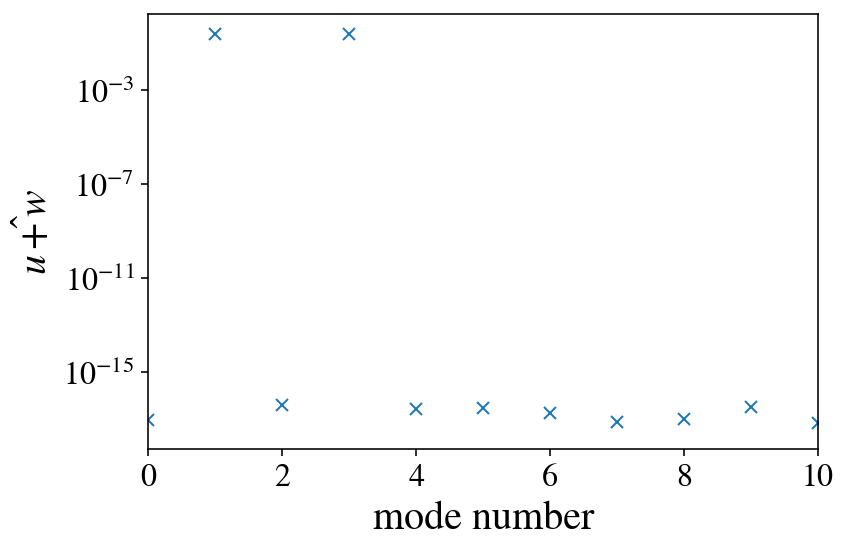

In [39]:
plt.semilogy(np.abs(wu_prod['c']),'x')
plt.xlabel('mode number')
plt.ylabel(r'$\hat{u + w}$')
plt.xlim(0,10)

Work this out:

$$
u(x) = \sum_k \hat{u}_k e^{ikx} = u_{-2} e^{-2ix} + u_{-1} e^{-ix} +  u_0 + u_1 e^{ix} + u_2 e^{2ix},
$$
and
$$
w(x) = \sum_k \hat{w}_k e^{ikx} = w_{-2} e^{-2ix} + w_{-1} e^{-ix} +  w_0 + w_1 e^{ix} + w_2 e^{2ix},
$$

This means

$$
u(x) w(x) = (u_{-2} e^{-2ix} + u_{-1} e^{-ix} +  u_0 + u_1 e^{ix} + u_2 e^{2ix})(w_{-2} e^{-2ix} + w_{-1} e^{-ix} +  w_0 + w_1 e^{ix} + w_2 e^{2ix}).
$$

Set $u_1 = 1$, $w_2 = 1$ ,all else 0,

$$
u(x) w(x) = (e^{-ix} + e^{ix})(e^{-2ix} + e^{2ix}) = e^{-3ix} + e^{-ix} + e^{ix} + e^{3ix},
$$

so in the product, modes 1 and 3 are non-zero.



## Time-dependence

W'ere really interested in 

$$u(x, t) = \sum_k \hat{u}_k(t) e^{ikx} = \hat{u}_0 + \hat{u}_1(t) e^{ix},$$

and let's say we have a linear instability for $k = 1$, then

$$\hat{u}_1(t) \propto e^{\sigma t}$$,

with $\Re{\sigma} > 0$ (real part > 0), so putting space and time together, we have

$$u(x, t) =  e^{\sigma t + ikx}$$,

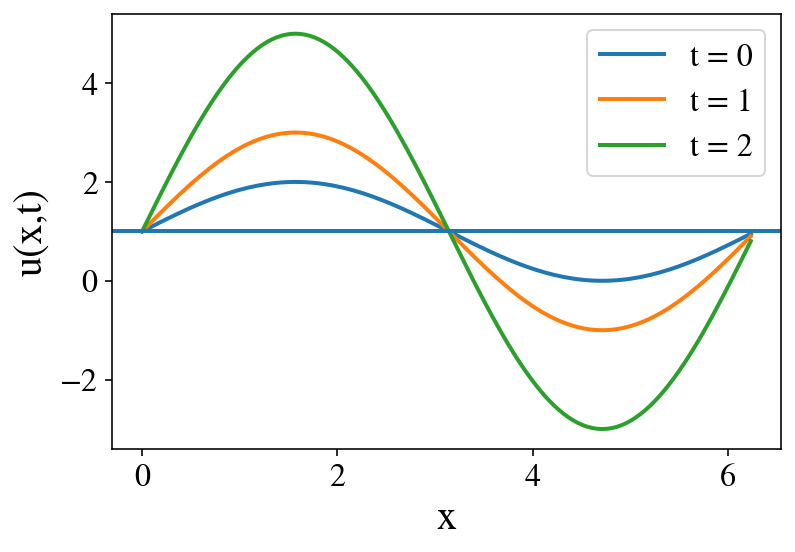

In [45]:
plt.plot(x,u['g'] + 1, label = "t = 0")
plt.plot(x,2*u['g'] + 1, label = "t = 1")
plt.plot(x, 4*u['g'] + 1, label = "t = 2")
plt.axhline(1)
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()

In the Navier Stokes equations, we have

$$ \partial_t u + u \partial_x u = -\partial_x p + \nu \partial_x^2 u$$,

so the non-linear term looks like

$$ (u_0 + u_1(t) e^{ix}) \partial_x (u_0 + u_1(t) e^{ix})$$,

and

$$\partial_x (u_0 + u_1(t) e^{ix}) = i u_1(t) e^{ix}$$,

so the nonlinear term becomes 

$$ (u_0 + u_1(t) e^{ix})(i u_1(t) e^{ix})$$,

putting the negative wavemodes back in,

$$(u_{-1}(t) e^{-ix} + u_0 + u_1(t) e^{ix})(-iu_{-1}(t) e^{-ix} + i u_1(t) e^{ix})$$

which is finally

$$ -u^2_{-1}(t) e^{-2ix} - u_0 u_{-1}(t) e^{-ix} - iu_1(t)u_{-1}(t) \dots$$,

but $- iu_1(t)u_{-1}(t)$ is added to the mean!